# T20I Batting Analysis

T20i WC for 2022 is gonna Begin and the cricket mood is on,Hence decided to analyze the most Entertaining part of the T20 cricket, Batting Records and i found this dataset in Kaggle which contains data for Matches held upto 2019,Let us analyze the dataset

In [1]:
title = 'T20i Batting Analysis'

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import warnings
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Preparation and Cleaning

Lets's first load our dataset and take a look on it to have an overview of what our dataset looks like and analyse it

In [3]:
df = pd.read_csv('t20.csv')
df.shape

(2006, 17)

The dataset Contains 2006 Entries and 17 columns

In [4]:
df.head(5)

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120,NaN
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113,NaN
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61,NaN
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2006 non-null   int64  
 1   Player       2006 non-null   object 
 2   Span         2006 non-null   object 
 3   Mat          2006 non-null   int64  
 4   Inns         2006 non-null   object 
 5   NO           2006 non-null   object 
 6   Runs         2006 non-null   object 
 7   HS           2006 non-null   object 
 8   Ave          2006 non-null   object 
 9   BF           2006 non-null   object 
 10  SR           2006 non-null   object 
 11  100          2006 non-null   object 
 12  50           2006 non-null   object 
 13  0            2006 non-null   object 
 14  4s           2006 non-null   object 
 15  6s           2006 non-null   object 
 16  Unnamed: 15  0 non-null      float64
dtypes: float64(1), int64(2), object(14)
memory usage: 266.5+ KB


In [6]:
# Replacing columns with lower case letters

df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'player', 'span', 'mat', 'inns', 'no', 'runs', 'hs',
       'ave', 'bf', 'sr', '100', '50', '0', '4s', '6s', 'unnamed: 15'],
      dtype='object')

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

unnamed: 0        0
player            0
span              0
mat               0
inns              0
no                0
runs              0
hs                0
ave               0
bf                0
sr                0
100               0
50                0
0                 0
4s                0
6s                0
unnamed: 15    2006
dtype: int64

Since the column Unamed: 15 is not needed for Analysis we have removed it using .pop() method and now we dont have any null values in the dataset

In [9]:
t20_df = df.rename(columns = {'100':'century','50':'fifty','0':'duck','4s':'fours','6s':'sixers'})
t20_df
#Lets Rename the 100,50,0,4s,6s columns as Century,Fifty,Duck,Fours and Sixer columns to avoid Hassle

,unnamed: 0,player,span,mat,inns,no,runs,hs,ave,bf,sr,century,fifty,duck,fours,sixers,unnamed: 15
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120,NaN
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113,NaN
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61,NaN
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,1,SG Whittingham (SCOT),2018-2018,3,-,-,-,-,-,-,-,-,-,-,-,-,NaN
2002,2,LJ Woodcock (NZ),2010-2011,3,-,-,-,-,-,-,-,-,-,-,-,-,NaN
2003,3,Zamir Khan (AFG),2012-2012,1,-,-,-,-,-,-,-,-,-,-,-,-,NaN
2004,4,S Zargar (Mex),2019-2019,1,-,-,-,-,-,-,-,-,-,-,-,-,NaN


In [10]:
# replacing '-' values with 0 :

t20_df['runs']=t20_df['runs'].replace(to_replace = '-', value = 0)
t20_df['ave'] =t20_df['ave'].replace(to_replace = '-', value = 0)
t20_df['sr'] =t20_df['sr'].replace(to_replace = '-', value = 0)
t20_df['hs'] =t20_df['hs'].replace(to_replace = '-', value = 0)
t20_df['fifty'] =t20_df['fifty'].replace(to_replace = '-', value = 0)
t20_df['century'] =t20_df['century'].replace(to_replace = '-', value = 0)
t20_df['duck'] =t20_df['duck'].replace(to_replace = '-', value = 0)
t20_df['fours'] =t20_df['fours'].replace(to_replace = '-', value = 0)
t20_df['sixers'] =t20_df['sixers'].replace(to_replace = '-', value = 0)
t20_df['hs'] =t20_df['hs'].replace(to_replace = 'NaN', value = 0)

In [11]:
# removing * from Higest scores where batsman remained notout :

t20_df['hs']=t20_df['hs'].str.split('*').str[0]

In [12]:
t20_df['runs'] =t20_df['runs'].astype(int)
t20_df['ave'] =t20_df['ave'].astype(float)
t20_df['sr'] =t20_df['sr'].astype(float)
t20_df['hs'] =t20_df['hs'].astype(float)
t20_df['fifty'] =t20_df['fifty'].astype(int)
t20_df['century'] =t20_df['century'].astype(int)
t20_df['duck'] =t20_df['duck'].astype(int)
t20_df['fours'] =t20_df['fours'].astype(int)
t20_df['sixers'] =t20_df['sixers'].astype(int)

## Exploratory Data Analysis

Now that our dataset is good to go, we can analyze it using plots, pie charts and graphs

In [13]:
t20_df.sample(5)

,unnamed: 0,player,span,mat,inns,no,runs,hs,ave,bf,sr,century,fifty,duck,fours,sixers,unnamed: 15
842,42,Haseeb Amjad (HKG),2014-2016,18,10,6,45,12.0,11.25,45,100.00,0,0,0,3,1,NaN
1835,35,Shaheen Shah Afridi (PAK),2018-2019,10,1,1,0,0.0,0.00,2,0.00,0,0,0,0,0,NaN
155,5,Younis Khan (PAK),2006-2010,25,23,3,442,51.0,22.10,364,121.42,0,2,2,31,12,NaN
1081,31,B Ivanov (),2019-2019,3,3,1,24,14.0,12.00,55,43.63,0,0,0,1,0,NaN
1083,33,MJ McClenaghan (ICC/NZ),2012-2018,29,8,4,24,10.0,6.00,23,104.34,0,0,2,1,2,NaN


## Most Matches Played by a Player

Lets Find Out Which players have played the Most No of Matches So far and it may change in future with more no of t20is being played

In [14]:
matches_df = t20_df.sort_values(['mat'],ascending=False)
most_no_of_matches_df = matches_df.iloc[0:10]
#We Create a dataframe "most_no_of_matches_df" and Store the Top 15 players who have played the most matches in it.
most_no_of_matches_df

,unnamed: 0,player,span,mat,inns,no,runs,hs,ave,bf,sr,century,fifty,duck,fours,sixers,unnamed: 15
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75.0,30.58,1824,124.06,0,7,1,186,61,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118.0,32.10,1905,138.21,4,19,6,234,120,NaN
33,33,Shahid Afridi (ICC/PAK),2006-2018,99,91,12,1416,54.0,17.92,944,150.00,0,4,8,103,73,NaN
19,19,MS Dhoni (INDIA),2006-2019,98,85,42,1617,56.0,37.60,1282,126.13,0,2,1,116,52,NaN
13,13,LRPL Taylor (NZ),2006-2019,95,87,19,1743,63.0,25.63,1430,121.88,0,5,5,110,65,NaN
28,28,KJ O'Brien (IRE),2008-2019,90,83,10,1504,124.0,20.60,1124,133.80,1,3,10,117,69,NaN
10,10,Mohammad Hafeez (PAK),2006-2018,89,86,8,1908,86.0,24.46,1643,116.12,0,10,6,196,51,NaN
6,6,EJG Morgan (ENG),2009-2019,86,84,17,2002,91.0,29.88,1475,135.72,0,11,3,151,96,NaN
14,14,Umar Akmal (PAK),2009-2019,84,79,14,1690,94.0,26.00,1377,122.73,0,8,10,122,55,NaN
41,41,Mushfiqur Rahim (BDESH),2006-2019,84,76,13,1265,72.0,20.07,1060,119.33,0,5,5,110,31,NaN


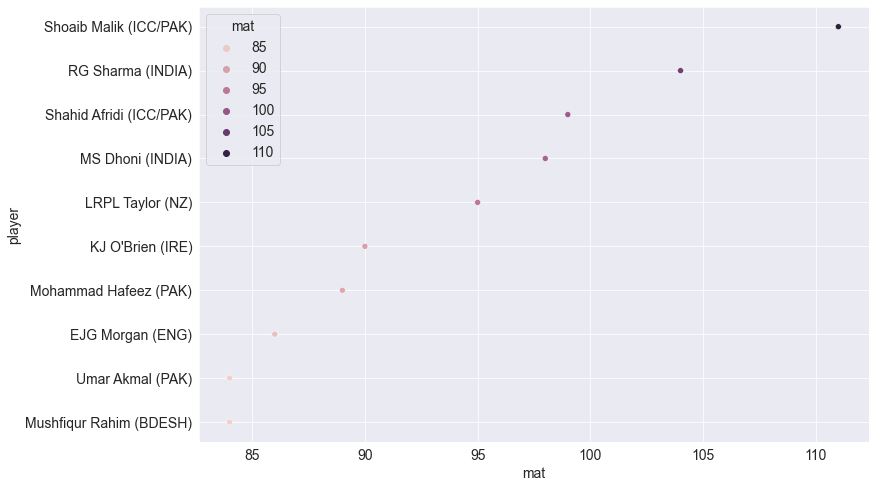

In [15]:
sns.scatterplot(x = 'mat', y = 'player',data =most_no_of_matches_df,hue = "mat");


8 out of 10 players in this List are retired and it shows that those who played from beginning of T20s have played the most no of matches and others have to do the catchups also with more and more T20is being played this data may change very soon

## Most Hundreds Scored by the Players in T20Is

In [16]:
df = t20_df

<AxesSubplot:title={'center':'Most 100s By a Player in T20Is'}, xlabel='player', ylabel='century'>

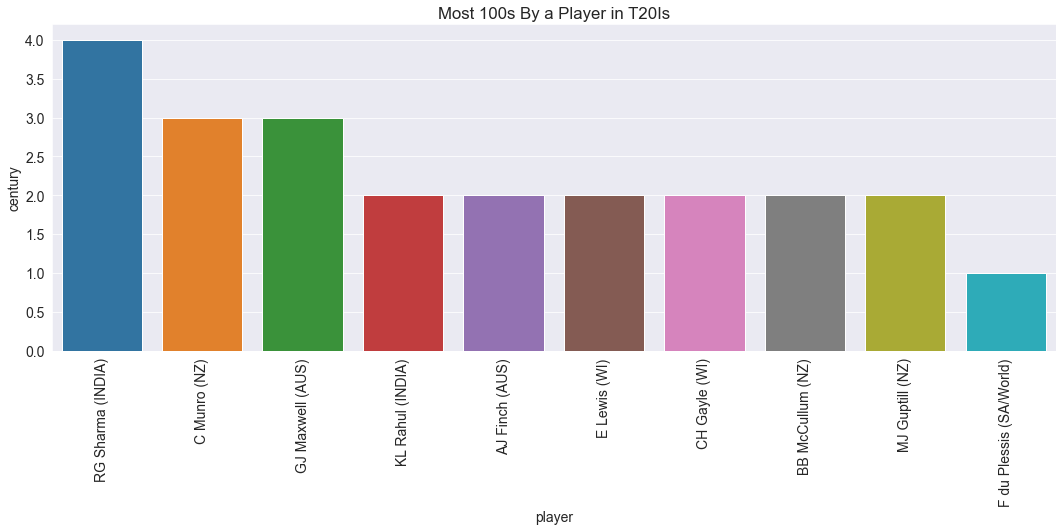

In [59]:
most_100s = t20_df.sort_values(['century'],ascending=False).head(10)

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)

plt.title('Most 100s By a Player in T20Is')
sns.barplot(x= most_100s.player, y = most_100s.century)

**Conclusion:** 

Hence we can see that all the players in this list who scored Centuries are either Openers or Top Order Batsmen,Since they have adequate no.of balls to score 100s,    Hardluck Finishers   !!!

## Most Runs in T20i History

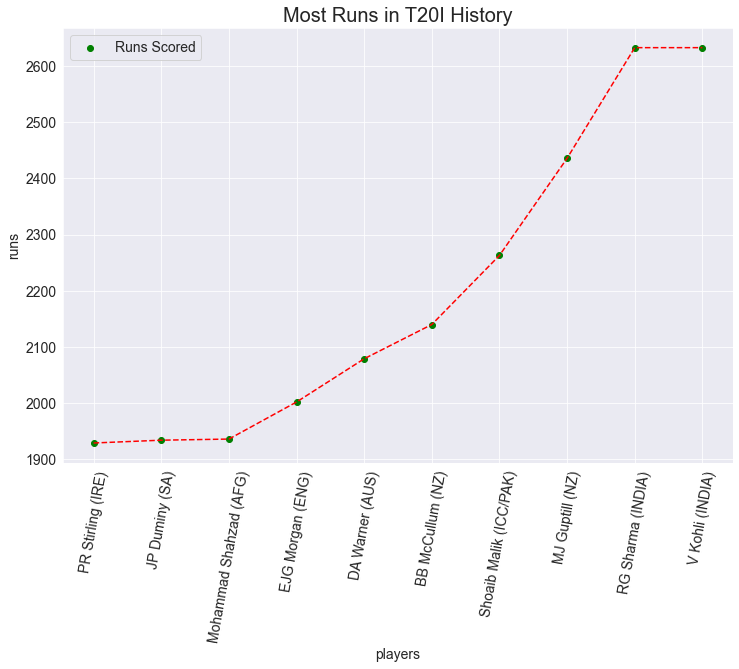

In [27]:
Most_runs = t20_df.sort_values('runs').tail(10)


plt.scatter(Most_runs.player,Most_runs.runs,color='g');
plt.plot(Most_runs.player,Most_runs.runs,color='r',ls = '--');
plt.xticks(rotation=80)
plt.xlabel('players')
plt.ylabel('runs')
plt.title('Most Runs in T20I History',fontsize=20)
plt.legend(['Runs Scored']);
plt.show()

Virat Kholi tops the list along with Rohit sharma followed by Veterans of the Game ,But we can see that Virat have taken fewer innings than Rohit and also scored at the same Rate

## Best Batting Index

Batting Index is a Combination of Average + Strike Rate and is used to calculate the destruction level of a batsman,It was followed few years back in Natwest T20 Blast in England,Usually a Index above 170 is considered great,Lets analyse the Batting Index for the Players 

In [28]:
t20_df["ave"] = t20_df["ave"].astype(float) #Converted Strings in Dataframe to float datatype
t20_df["sr"] = t20_df["sr"].astype(float)

In [30]:
t20_df['batting_index'] = t20_df["ave"] + t20_df["sr"]
t20_df.head(5)

,unnamed: 0,player,span,mat,inns,no,runs,hs,ave,bf,sr,century,fifty,duck,fours,sixers,unnamed: 15,batting_index
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94.0,52.66,1907,138.07,0,24,2,247,71,NaN,190.73
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118.0,32.10,1905,138.21,4,19,6,234,120,NaN,170.31
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105.0,33.36,1810,134.58,2,15,2,215,113,NaN,167.94
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75.0,30.58,1824,124.06,0,7,1,186,61,NaN,154.64
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123.0,35.66,1571,136.21,2,13,3,199,91,NaN,171.87


In [31]:
batting_index_df = t20_df[['player','mat','batting_index']]
batting_index_df.nlargest(10,'batting_index')

,player,mat,batting_index
1582,Qasim Zia (BAH),3,400.00
776,Mirza Ahsan (Aut),5,360.55
1400,Mohammad Asif (PAK),11,300.00
1157,Irfan Mir (Chile),4,290.42
434,Faisal Khan (Saudi),4,283.94
985,KRP Silva (USA),2,282.66
319,S Wickramasekara (CZK-R),5,277.09
1060,RK Kleinveldt (SA),6,275.00
1300,Mohammad Rafique (BDESH),1,273.00
523,LA Dunbar (Serb),2,271.74


We can see that players who have played very fewer games compared to others,SO lets fix this by checking players who have atleast 25 matches experience

In [34]:
updated_batting_index_df = t20_df[t20_df.mat > 25]

In [35]:
updated_batting_index_df =updated_batting_index_df.nlargest(10,"batting_index")

Now we have filtered players by the criteria that they Must have played atleast 25 matches to be eligible

In [36]:
best_batting_index_df = updated_batting_index_df[["player","inns","batting_index"]]
best_batting_index_df

,player,inns,batting_index
23,GJ Maxwell (AUS),54,195.02
12,AJ Finch (AUS),58,194.82
25,C Munro (NZ),57,190.96
0,V Kohli (INDIA),70,190.73
51,KL Rahul (INDIA),31,190.22
721,Hasan Ali (PAK),10,186.48
60,HG Munsey (SCOT),36,184.11
71,E Lewis (WI),28,183.97
46,KP Pietersen (ENG),36,179.44
34,Babar Azam (PAK),36,177.66


Text(0.5, 1.0, 'Best Batting Index')

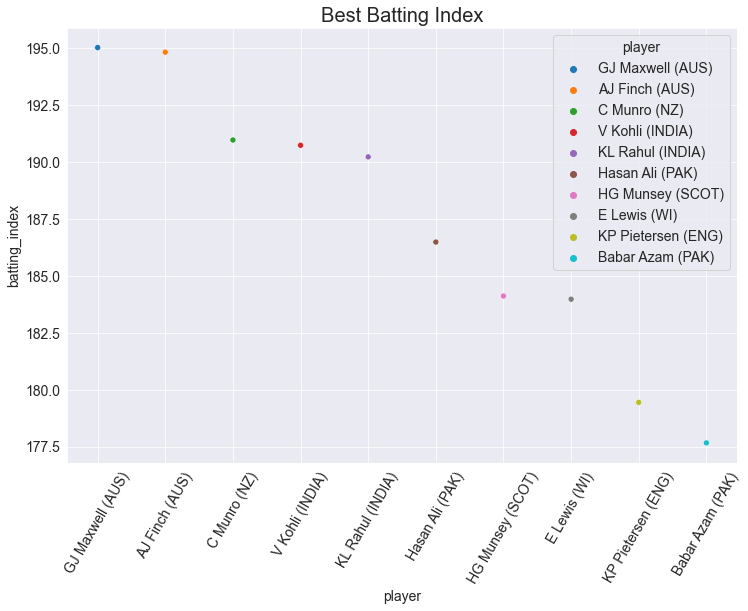

In [43]:
sns.scatterplot(x= "player",y ="batting_index",data =best_batting_index_df,hue = 'player');
plt.xticks(rotation=60);
plt.title('Best Batting Index',fontsize=20)

So We can see that Glenn Maxwell and Aaron Finch have the Best Batting Index and mindyou both are Aussies,No wonder Aus lifted the T20Wc 2021 with their Brute force ,Also Hasan Ali @ no 6 is Quite Surprising considering he is a bowler who can tonk some balls!!!

## Question and Answers

Now, let us answer some basic questions that one might want to know about this Dataset

### Question : Which Player have the Most 50+ Scores?


In [ ]:
t20_df["century"] = t20_df["century"].astype(float) #Converted Strings in Dataframe to float datatype
t20_df["fifty"] = t20_df["fifty"].astype(float)

In [51]:
t20_df['Most_50plus_scores'] = t20_df["fifty"] + t20_df["century"]
t20_df.head(5)

,unnamed: 0,player,span,mat,inns,no,runs,hs,ave,bf,...,century,fifty,duck,fours,sixers,unnamed: 15,batting_index,Most 50+ scores,Most_50plus_ scores,Most_50plus_scores
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94.0,52.66,1907,...,0,24,2,247,71,NaN,190.73,24,24,24
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118.0,32.10,1905,...,4,19,6,234,120,NaN,170.31,23,23,23
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105.0,33.36,1810,...,2,15,2,215,113,NaN,167.94,17,17,17
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75.0,30.58,1824,...,0,7,1,186,61,NaN,154.64,7,7,7
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123.0,35.66,1571,...,2,13,3,199,91,NaN,171.87,15,15,15


In [52]:
Most_50plus_scores_df = t20_df[['player','Most_50plus_scores']]
Most_50plus_scores_df = Most_50plus_scores_df.head(5) 

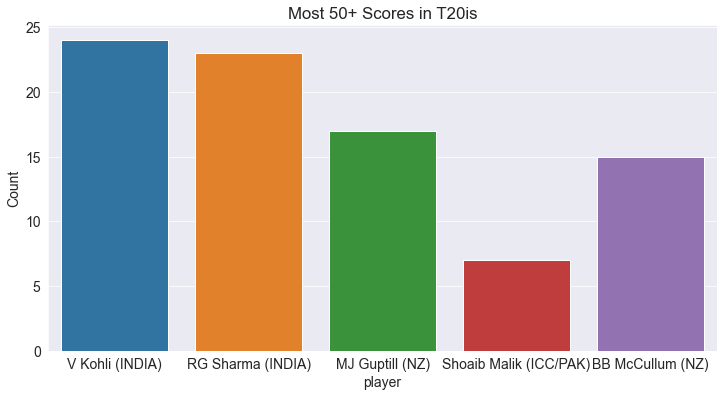

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x=Most_50plus_scores_df.player, y=Most_50plus_scores_df.Most_50plus_scores)
plt.title('Most 50+ Scores in T20is')
plt.ylabel('Count')
plt.show()

So we can conclude that eventhough Virat doesnt have a 100 he tops the chart with 24 Fifties ,Closely followed by Rohit (19 fifties and 4 hundreds)

### Question: Who scored the Most Boundaries and Sixers?

In [56]:
t20_df['maximum_boundaries'] = t20_df["fours"] + t20_df["sixers"]
t20_df.head(5)

,unnamed: 0,player,span,mat,inns,no,runs,hs,ave,bf,...,fifty,duck,fours,sixers,unnamed: 15,batting_index,Most 50+ scores,Most_50plus_ scores,Most_50plus_scores,maximum_boundaries
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94.0,52.66,1907,...,24,2,247,71,NaN,190.73,24,24,24,318
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118.0,32.10,1905,...,19,6,234,120,NaN,170.31,23,23,23,354
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105.0,33.36,1810,...,15,2,215,113,NaN,167.94,17,17,17,328
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75.0,30.58,1824,...,7,1,186,61,NaN,154.64,7,7,7,247
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123.0,35.66,1571,...,13,3,199,91,NaN,171.87,15,15,15,290


In [57]:
Maximum_boundaries_df = t20_df[['player','maximum_boundaries']]
Maximum_boundaries_df = Maximum_boundaries_df.head(5) 


Text(0.5, 1.0, 'Most Boundaries Scored by a Player')

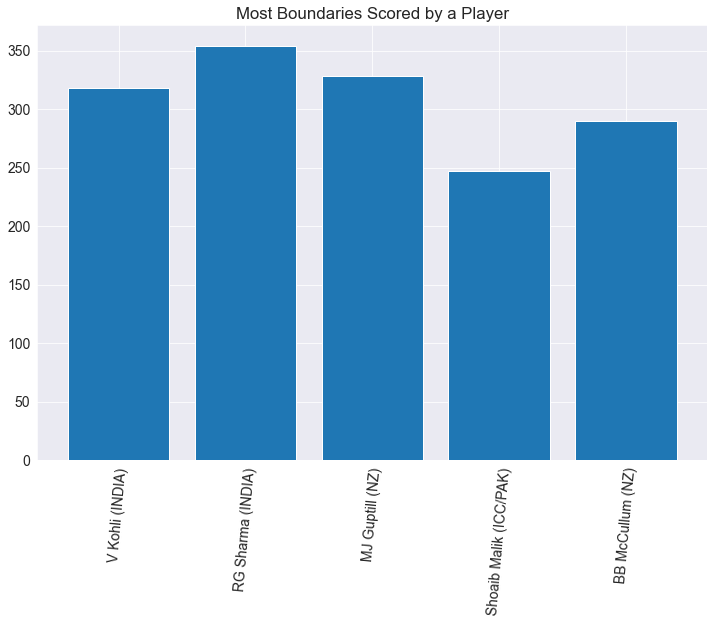

In [58]:
plt.bar(Maximum_boundaries_df.player,Maximum_boundaries_df.maximum_boundaries)
plt.xticks(rotation = 85);
plt.title("Most Boundaries Scored by a Player")

Rohit sharma have scored the Most boundaries with 354 (234 fours and 120 sixers) followed by M Guptill and Virat 

## Inferences and Conclusion:

Now we can understand why T20s are the crowd-pullers,They are packed with power and entertainment which is evident with the Boundaries and Strike rate of players,With T20 leagues emerging all over the world and most of the Audience shifting their focus towards T20s ,Cricket Economy is gonna circulate around this format.Virat and Rohit have dominated the Runs,50+ scores and Boundaries chart while Maxwell and Finch are Explosive batters as per data,So Box office is gauranteed when they Bat,Thank You 

## References:

Kaggle Dataset - (https://www.kaggle.com/datasets/mahendran1/icc-cricket)                                                                                 
Article about T20 Economy -(https://www.businesslive.co.za/fm/life/sport/2022-08-18-big-t20-money-threatens-cricket-as-we-know-it/)